#Group
# Samira abobakr ahmed mohamed khalaf 
#Fatma Eldesouky Aneis Eldesouky


# **Documentation**

### **Import Libraries**

In [ ]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import seaborn as sns# GRAPHING AND VISUALIZATIONS
#for ignoring warning
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#for Model
from tensorflow import keras
from keras.models import Sequential
#import keras layers to using in to build the model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.layers import *
from keras.models import Model, load_model
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras import optimizers
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical#Converts a class vector (integers) to binary class matrix 

### **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the train data 
train_set= pd.read_csv('/content/drive/MyDrive/ProjectDL/fashion-mnist_train.csv')

In [ ]:
#reading the test data 
test_set= pd.read_csv('/content/drive/MyDrive/ProjectDL/fashion-mnist_test.csv')

## **Train data**

In [ ]:
#Display first five rows from train data
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# get the summary of the train data .
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
# print type of train data
type(train_set)

pandas.core.frame.DataFrame

### **label**

In [ ]:
#label of the data 
y_train = train_set['label']

In [ ]:
#unique classes in label
y_train.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

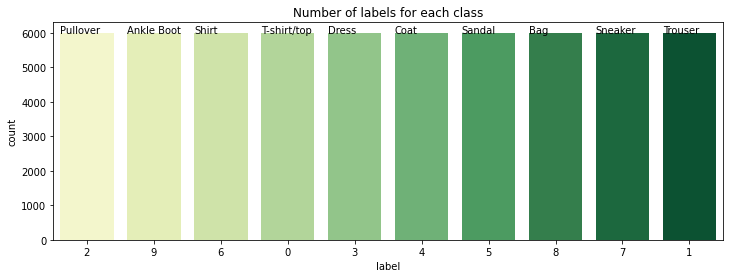

In [ ]:
#check balance of data
#putting classes in dectionary which each class represent type of fashion
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
class_names = list(labels.values())
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index, palette='YlGn')
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
# recall the function that plot each class in train data    
plot_label_per_class(train_set)
output=len(train_set["label"].unique())

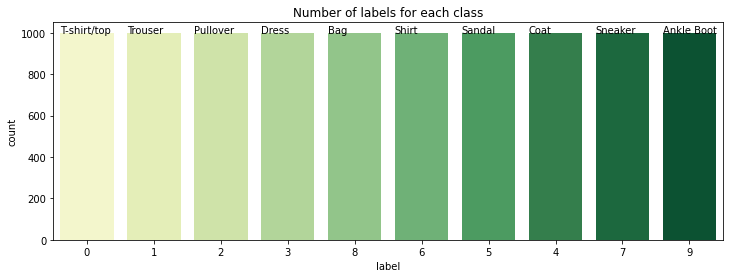

In [ ]:
#recall the function that plot each class in test data
plot_label_per_class(test_set)
output=len(test_set["label"].unique())

As we see the data is **balanced** 

### **Features**

In [ ]:
#cheak if train data contain null values
train_set.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
#cheak if test data contain null values
train_set.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
# data preprocessing
def data_preprocessing(raw):
#Converts a class vector (integers) to binary class matrix
    out_y = to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    #reshape image size
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    #normalization 
    out_x = x_shaped_array / 255
    return out_x, out_y

In [ ]:
# Apply preprocessing functin on the train and test data
X, y = data_preprocessing(train_set)
X_test, y_test = data_preprocessing(test_set)
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# display some image 
label_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def display(X):
  plt.figure(figsize = (10,10))
  for i in range(50):
      plt.subplot(5,10,i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(True)
      plt.imshow(X[i][:,:,0],cmap = plt.cm.binary)
      plt.xlabel(label_names[y_train[i]])
  plt.show() 

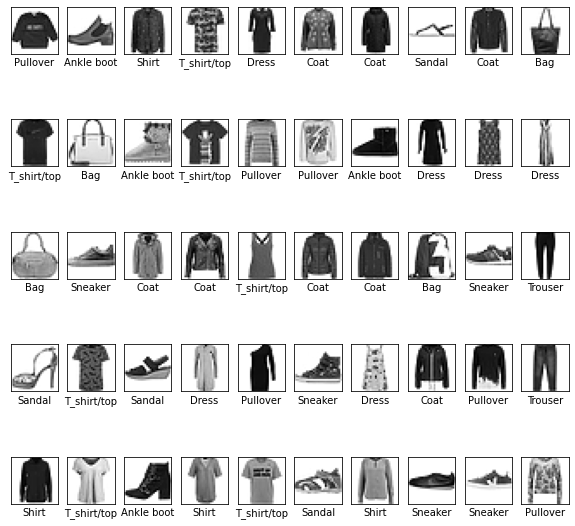

In [ ]:
# display some image in train data
display(X)

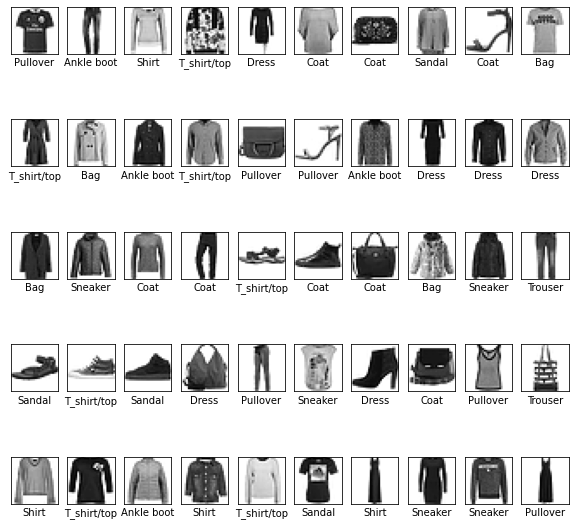

In [ ]:
# display some image in test data
display(X_test)

## **Build Model**

Ref:https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 https://www.ibm.com/cloud/learn/convolutional-neural-networks

In [ ]:
def models():
 # Model
 #using 32 filters with size 3*3 and relu activation function with input image shape=28*28*1
    cnn = Sequential()
    cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    cnn.add(BatchNormalization())# applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1

    cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(Dropout(0.25))

    cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(Dropout(0.25))

    cnn.add(Flatten())
    cnn.add(Dense(512, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(Dropout(0.5))
    cnn.add(Dense(128, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(Dropout(0.5))
    #Dense layer with output=10 amd activation softmax because multiclass
    cnn.add(Dense(10, activation='softmax'))
    #using adam otimizer with learning rate=1e-3
    cnn.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

    print(cnn.summary())

    return cnn

In [ ]:
model=models()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        1

In [ ]:
# evaluate a model using k-fold cross-validation
from sklearn.model_selection import KFold
def evaluate_model(dataX, dataY,testx, testy,model, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds,shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train data
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		clr=ReduceLROnPlateau(
        monitor='loss',
        factor=0.5,
        patience=3,
        min_delta=0.01,
        cooldown=0,
        min_lr=1e-7,
        verbose=1)
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=256, validation_data=(testX, testY),  callbacks=[clr])
		# evaluate model on the test data
		_, acc = model.evaluate(testx, testy, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [ ]:

scores, histories=evaluate_model(X, y,X_test, y_test,model, n_folds=5)

Epoch 1/10
188/188 [==============================] - 10s 35ms/step - loss: 0.5703 - accuracy: 0.8039 - val_loss: 2.2426 - val_accuracy: 0.1546 - lr: 0.0010
Epoch 2/10
188/188 [==============================] - 6s 33ms/step - loss: 0.3350 - accuracy: 0.8805 - val_loss: 1.1276 - val_accuracy: 0.6145 - lr: 0.0010
Epoch 3/10
188/188 [==============================] - 6s 33ms/step - loss: 0.2716 - accuracy: 0.9054 - val_loss: 0.3083 - val_accuracy: 0.8898 - lr: 0.0010
Epoch 4/10
188/188 [==============================] - 6s 32ms/step - loss: 0.2340 - accuracy: 0.9164 - val_loss: 0.2770 - val_accuracy: 0.9042 - lr: 0.0010
Epoch 5/10
188/188 [==============================] - 6s 32ms/step - loss: 0.2002 - accuracy: 0.9294 - val_loss: 0.2552 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 6/10
188/188 [==============================] - 6s 32ms/step - loss: 0.1795 - accuracy: 0.9356 - val_loss: 0.2451 - val_accuracy: 0.9190 - lr: 0.0010
Epoch 7/10
188/188 [==============================] - 6s 32ms/s

In [ ]:
# plot diagnostic learning curves
from matplotlib.pyplot import figure
def summarize_diagnostics(histories):
	figure(figsize=(15, 10), dpi=80)
	for i in range(len(histories)):
		m=i+1
		# plot loss
		plt.subplot(211)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], label='train(fold no. %s ) '%m)
		plt.plot(histories[i].history['val_loss'], label='test(fold no. %s ) '%m)
		plt.xlabel("no. of ebocs")
		plt.ylabel("error")
		plt.legend(loc ="upper right")
		# plot accuracy
		plt.subplot(212)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], label=' train (fold no. %s)'%m)
		plt.plot(histories[i].history['val_accuracy'], label=' test (fold no. %s)'%m)
		plt.xlabel("no. of ebocs")
		plt.ylabel("accuracy")
	# plt.ylim(0, 1)
		plt.legend(loc ="lower right")
	plt.show()

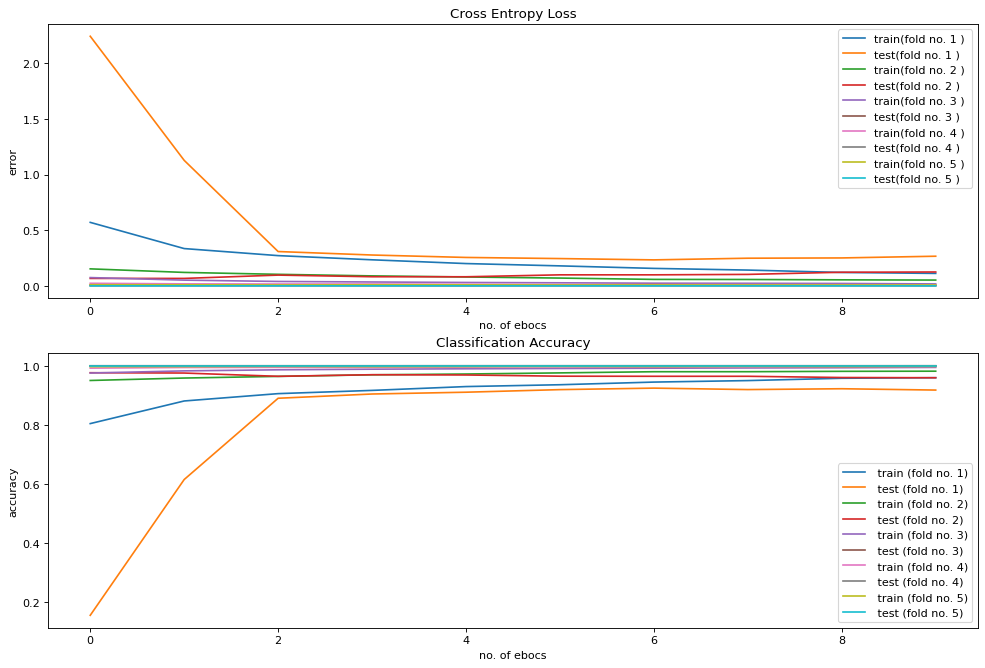

In [ ]:
# learning curves
summarize_diagnostics(histories)

In [ ]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

Accuracy: mean=93.632 std=0.853, n=5


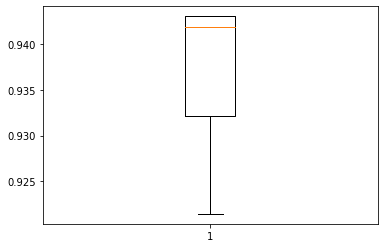

In [ ]:
# summarize estimated performance
summarize_performance(scores)

## **Corrolation**



In [ ]:
from sklearn.metrics import confusion_matrix
#corrolation between Y_true and Y_predicted
from sklearn.metrics import confusion_matrix
predict_x=model.predict(X_test,verbose=0) 
y_predict=np.argmax(predict_x,axis=1)

In [ ]:
y_predict

array([0, 1, 2, ..., 8, 8, 1])

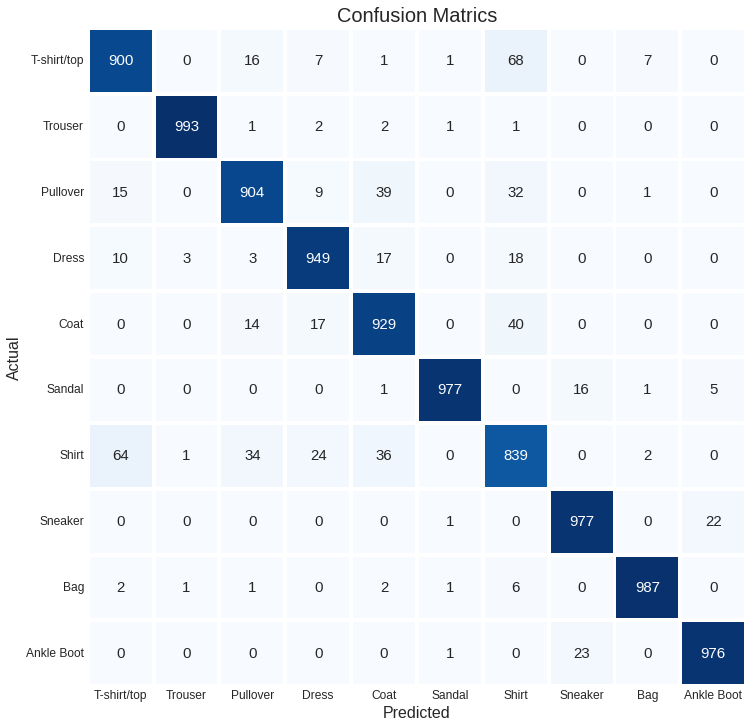

In [ ]:
y_true=test_set["label"]
conf_matrix = confusion_matrix(y_true, y_predict)
plt.style.use('seaborn-dark')
fig, axis = plt.subplots(1,1, figsize=(18,10), constrained_layout = True)
axis = sns.heatmap(conf_matrix, annot=True, fmt = '.0f', cbar=False, cmap='Blues',
                    linewidths=3, square=True, ax = axis, annot_kws={"fontsize":15})
axis.set_title(f"Confusion Matrics", fontsize=20, y=1.05);
axis.set_xlabel('Predicted', fontsize=16)
axis.set_ylabel('Actual', fontsize=16)
axis.set_xticklabels(class_names, fontsize=12)
axis.set_yticklabels(class_names, fontsize=12, rotation=0);

## **leNet5 model**

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adagrad,Adadelta,Adam,Adamax,Nadam
model1= Sequential()

#Layer 1 (C1)
#Conv Layer 
model1.add(Conv2D(filters = 6, 
                  kernel_size = 5, 
                  strides = 1, 
                  activation = 'relu', 
                  input_shape = (28,28,1)))

#layer 2 (S2)
#Pooling layer 
model1.add(MaxPooling2D(pool_size = 2, strides = 2))

#Layer 3 (C3)
#Conv Layer 
model1.add(Conv2D(filters =16 , 
                  kernel_size = 5,
                  strides = 1,
                  activation = 'relu',
                  input_shape = (14,14,6)))

#layer 4 (S4)
#Pooling Layer 2
model1.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model1.add(Flatten())

#Layer 5 (C5)
#Fully connected layer
model1.add(Dense(units = 120, activation = 'relu'))

#Layer 6 (F6)
#Fully connected layer 
model1.add(Dense(units = 84, activation = 'relu'))

# 1/2 of neurons will be turned off randomly for more accuracy and reduce over fitting
model1.add(Dropout(0.5)) 

#Output Layer
model1.add(Dense(units = 10, activation = 'softmax'))


model1.compile(optimizer =Adamax(learning_rate=0.05), # optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
scores, histories=evaluate_model(X, y,X_test, y_test,model1, n_folds=5)

Epoch 1/10
188/188 [==============================] - 2s 7ms/step - loss: 0.9027 - accuracy: 0.6599 - val_loss: 0.5547 - val_accuracy: 0.7859 - lr: 0.0500
Epoch 2/10
188/188 [==============================] - 1s 5ms/step - loss: 0.5848 - accuracy: 0.7865 - val_loss: 0.5000 - val_accuracy: 0.8188 - lr: 0.0500
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.5356 - accuracy: 0.8079 - val_loss: 0.4703 - val_accuracy: 0.8253 - lr: 0.0500
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.4929 - accuracy: 0.8221 - val_loss: 0.4676 - val_accuracy: 0.8253 - lr: 0.0500
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.4694 - accuracy: 0.8321 - val_loss: 0.4317 - val_accuracy: 0.8425 - lr: 0.0500
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 0.4571 - accuracy: 0.8364 - val_loss: 0.4267 - val_accuracy: 0.8424 - lr: 0.0500
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - lo

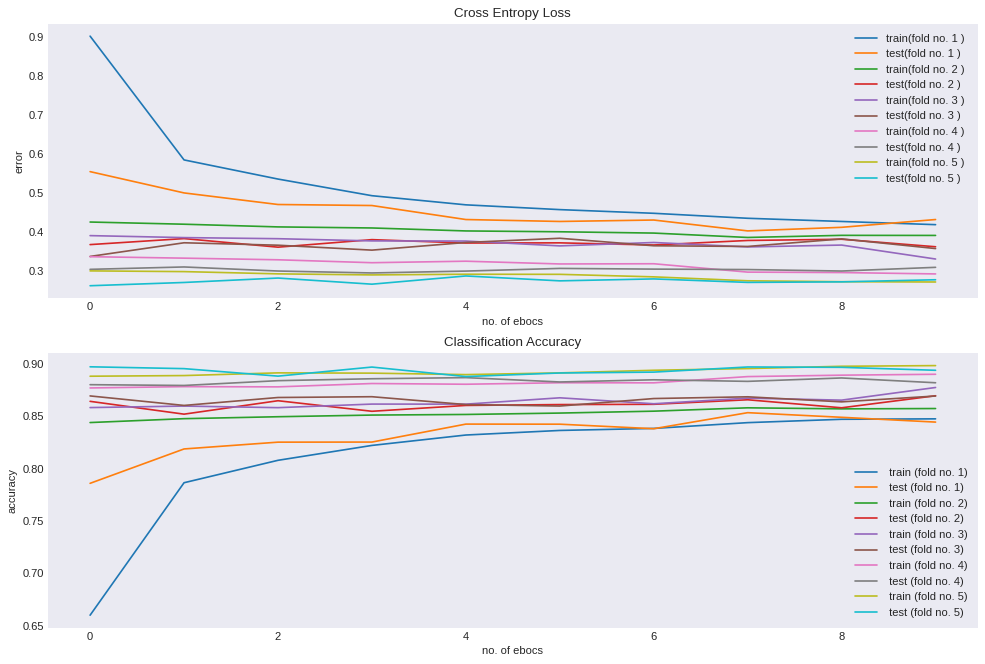

In [ ]:
# learning curves
summarize_diagnostics(histories)

Accuracy: mean=86.606 std=1.002, n=5


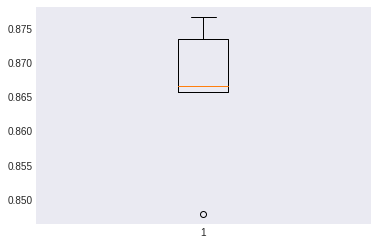

In [ ]:
# summarize estimated performance
summarize_performance(scores)

#Tring to use Transferlearning to learn LeNet Model

In [ ]:
# extract the label
y_train=train_set["label"]
y_test=test_set["label"]

In [ ]:
#import the backend module 
from keras import backend as K
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

In [ ]:
# prepare the data
x_train, y = data_preprocessing(train_set)
x_test, Y_test = data_preprocessing(test_set)

In [ ]:
# create two datasets one with digits below 5 and one with 5 and above
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

In [ ]:
# reshape first 5 classes then convert it to categorical
x_train = x_train_lt5.reshape((x_train_lt5.shape[0],) + input_shape)
x_test =x_test_lt5.reshape((x_test_lt5.shape[0],) + input_shape)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
     # convert class vectors to binary class matrices
y_train =to_categorical(y_train_lt5, 5)
y_test = to_categorical(y_test_lt5, 5)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples


In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adagrad,Adadelta,Adam,Adamax,Nadam
model2 = Sequential()

#Layer 1 (C1)
#Conv Layer 
model2.add(Conv2D(filters = 6, 
                  kernel_size = 5, 
                  strides = 1, 
                  activation = 'relu', 
                  input_shape = (28,28,1)))

#layer 2 (S2)
#Pooling layer 
model2.add(MaxPooling2D(pool_size = 2, strides = 2))

#Layer 3 (C3)
#Conv Layer 
model2.add(Conv2D(filters =16 , 
                  kernel_size = 5,
                  strides = 1,
                  activation = 'relu',
                  input_shape = (14,14,6)))

#layer 4 (S4)
#Pooling Layer 2
model2.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model2.add(Flatten())

#Layer 5 (C5)
#Fully connected layer
model2.add(Dense(units = 120, activation = 'relu'))

#Layer 6 (F6)
#Fully connected layer 
model2.add(Dense(units = 84, activation = 'relu'))

# 1/2 of neurons will be turned off randomly for more accuracy and reduce over fitting
model2.add(Dropout(0.5)) 

#Output Layer
model2.add(Dense(units = 5, activation = 'softmax'))


model2.compile(optimizer =Adamax(learning_rate=0.05), # optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [ ]:
# train model for 5-digit classification [0..4]
scores, histories=evaluate_model(x_train,
        y_train,x_test, y_test,model2, n_folds=5)

Epoch 1/10
94/94 [==============================] - 1s 9ms/step - loss: 0.7667 - accuracy: 0.7012 - val_loss: 0.4530 - val_accuracy: 0.8218 - lr: 0.0500
Epoch 2/10
94/94 [==============================] - 1s 6ms/step - loss: 0.4626 - accuracy: 0.8310 - val_loss: 0.3873 - val_accuracy: 0.8473 - lr: 0.0500
Epoch 3/10
94/94 [==============================] - 1s 6ms/step - loss: 0.4130 - accuracy: 0.8524 - val_loss: 0.3643 - val_accuracy: 0.8673 - lr: 0.0500
Epoch 4/10
94/94 [==============================] - 1s 5ms/step - loss: 0.3870 - accuracy: 0.8622 - val_loss: 0.3833 - val_accuracy: 0.8635 - lr: 0.0500
Epoch 5/10
94/94 [==============================] - 0s 5ms/step - loss: 0.3741 - accuracy: 0.8644 - val_loss: 0.3660 - val_accuracy: 0.8690 - lr: 0.0500
Epoch 6/10
94/94 [==============================] - 0s 5ms/step - loss: 0.3557 - accuracy: 0.8745 - val_loss: 0.3276 - val_accuracy: 0.8773 - lr: 0.0500
Epoch 7/10
94/94 [==============================] - 0s 5ms/step - loss: 0.3488 - a

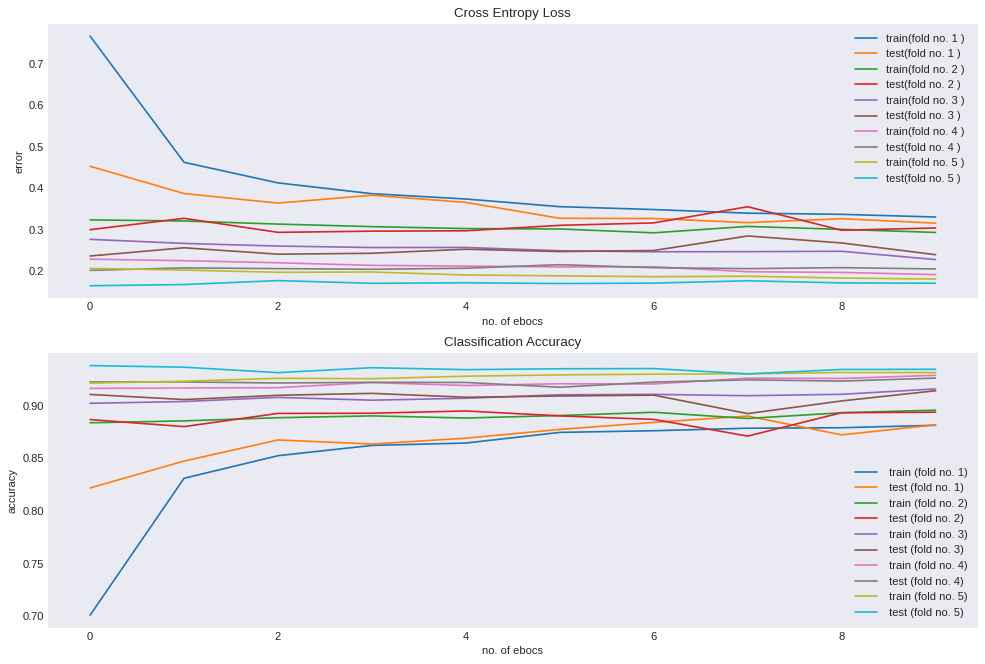

In [ ]:
# learning curves
summarize_diagnostics(histories)

Accuracy: mean=90.560 std=1.115, n=5


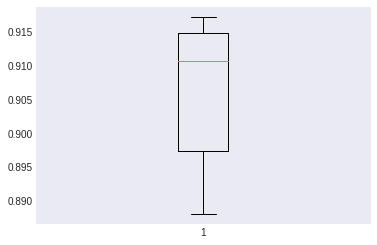

In [ ]:
# summarize estimated performance
summarize_performance(scores)

In [ ]:
# reshape second 5 classes then convert it to categorical
x_train = x_train_gte5.reshape((x_train_gte5.shape[0],) + input_shape)
x_test =x_test_gte5.reshape((x_test_gte5.shape[0],) + input_shape)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
  # convert class vectors to binary class matrices
y_train =to_categorical(y_train_gte5, 5)
y_test = to_categorical(y_test_gte5, 5)

x_train shape: (30000, 28, 28, 1)
30000 train samples
5000 test samples


In [ ]:
model2.layers

In [ ]:
# freeze feature layers and rebuild model
for layer in model2.layers[:5]:
    layer.trainable = False
    
for layer in model2.layers:
    print(layer.trainable)

False
False
False
False
False
True
True
True
True


In [ ]:
# Transfer Learning model

tl_model = Sequential(model2.layers[:5])

tl_model.add(Dense(512, activation='relu'))

tl_model.add(LeakyReLU(alpha=0.1))

tl_model.add(Dense(256, activation='relu'))

tl_model.add(BatchNormalization())

tl_model.add(Dense(5, activation='softmax'))

tl_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

tl_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 512)              

In [ ]:
# transfer: train dense layers for new classification task [5..9]
scores, histories=evaluate_model(x_train,
        y_train,x_test, y_test,tl_model, n_folds=5)

Epoch 1/10
94/94 [==============================] - 1s 7ms/step - loss: 0.2260 - accuracy: 0.9215 - val_loss: 0.3853 - val_accuracy: 0.9085 - lr: 0.0010
Epoch 2/10
94/94 [==============================] - 1s 6ms/step - loss: 0.1460 - accuracy: 0.9483 - val_loss: 0.2331 - val_accuracy: 0.9378 - lr: 0.0010
Epoch 3/10
94/94 [==============================] - 0s 5ms/step - loss: 0.1320 - accuracy: 0.9532 - val_loss: 0.1642 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 4/10
94/94 [==============================] - 0s 5ms/step - loss: 0.1262 - accuracy: 0.9531 - val_loss: 0.1526 - val_accuracy: 0.9480 - lr: 0.0010
Epoch 5/10
94/94 [==============================] - 1s 6ms/step - loss: 0.1129 - accuracy: 0.9581 - val_loss: 0.1352 - val_accuracy: 0.9525 - lr: 0.0010
Epoch 6/10
94/94 [==============================] - 0s 5ms/step - loss: 0.1049 - accuracy: 0.9621 - val_loss: 0.1663 - val_accuracy: 0.9373 - lr: 0.0010
Epoch 7/10
94/94 [==============================] - 0s 5ms/step - loss: 0.1017 - a

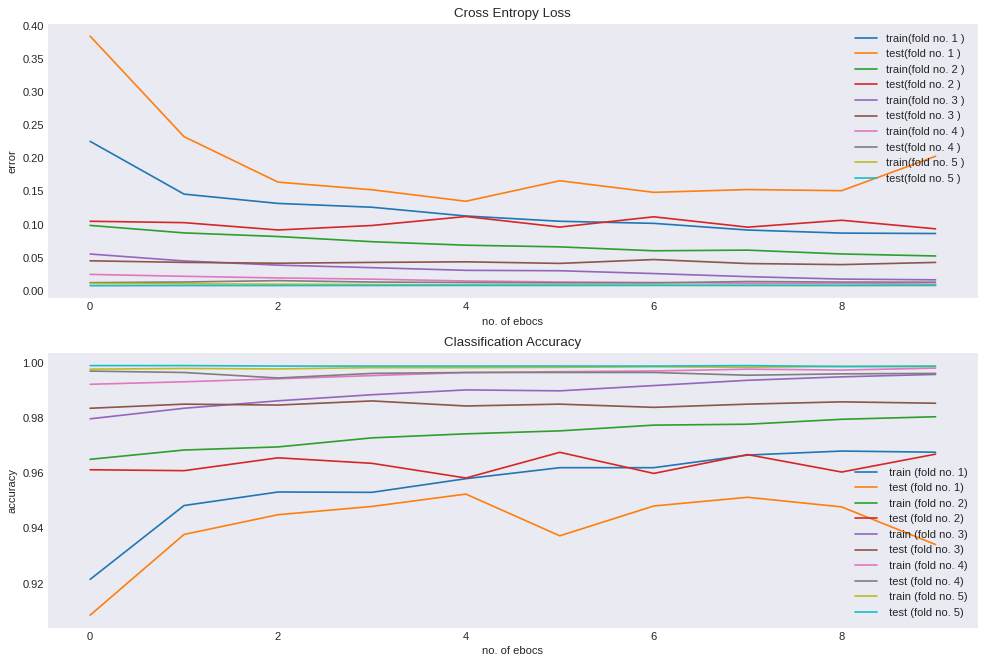

In [ ]:
summarize_diagnostics(histories)

Accuracy: mean=95.140 std=0.874, n=5


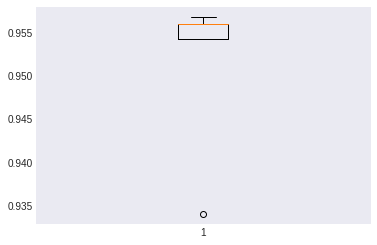

In [ ]:
# summarize estimated performance
summarize_performance(scores)



---

## **VGG19_Model**

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (48, 48, 3), classes = 10)

In [ ]:
#split data 
print(train_set.shape)
print(test_set.shape) 
train_X= np.array(train_set.iloc[:,1:])
test_X= np.array(test_set.iloc[:,1:])
train_Y= np.array (train_set.iloc[:,0])
test_Y = np.array(test_set.iloc[:,0]) 

(60000, 785)
(10000, 785)


In [ ]:
# Convert the images into 3 channels
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)
train_X.shape,test_X.shape

((60000, 784, 3), (10000, 784, 3))

In [ ]:
# Reshape images as per the tensor format required by tensorflow
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
# Resize the images 48*48 as required by VGG19
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])
train_X.shape, test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [ ]:
# Converting Labels to one hot encoded format
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [ ]:
# Splitting train data as train and validation data
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [ ]:
# Finally check the data size whether it is as per tensorflow and VGG19 requirement
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [ ]:
# Preprocessing the input 
X_train = preprocess_input(train_X)
X_val = preprocess_input(valid_X)
X_test = preprocess_input(test_X)

In [ ]:
# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size=256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size=256, verbose=1)
val_features = vgg19.predict(np.array(X_val), batch_size=256, verbose=1)

47/47 [==============================] - 5s 109ms/step


In [ ]:
# Flatten extracted features
train_features = np.reshape(train_features, (48000, 1*1*512))
test_features = np.reshape(test_features, (10000, 1*1*512))
val_features = np.reshape(val_features, (12000, 1*1*512))

In [ ]:
# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
reduce_learning = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    mode='auto',
    min_delta=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

In [ ]:
history = model.fit(
    train_features,
    train_label,
    epochs=50,
    validation_data=(val_features, valid_label),
    callbacks=callbacks
)

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7348 - accuracy: 0.7330 - val_loss: 3.3403 - val_accuracy: 0.3349 - lr: 0.0010
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6122 - accuracy: 0.7741 - val_loss: 5.3145 - val_accuracy: 0.2358 - lr: 0.0010
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5794 - accuracy: 0.7855 - val_loss: 5.0572 - val_accuracy: 0.2027 - lr: 0.0010
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5552 - accuracy: 0.7940 - val_loss: 6.3999 - val_accuracy: 0.2272 - lr: 0.0010
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5335 - accuracy: 0.8013 - val_loss: 13.6689 - val_accuracy: 0.1248 - lr: 0.0010
Epoch 6/50
1499/1500 [============================>.] - ETA: 0s - loss: 0.5170 - accuracy: 0.8071
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1500/1500 [============================

In [ ]:
score =model.evaluate(test_features,test_Y_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3834114372730255
Test accuracy: 0.8607000112533569


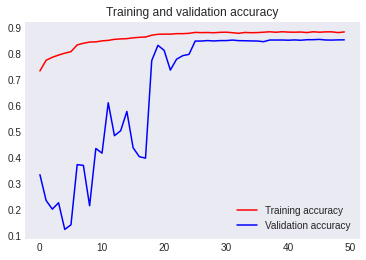

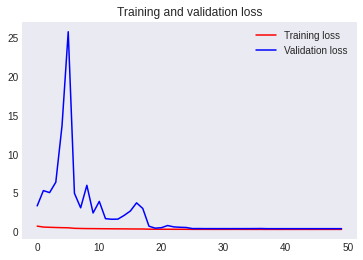

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## **VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
#split data 
print(train_set.shape)
print(test_set.shape) 
train_X= np.array(train_set.iloc[:,1:])
test_X= np.array(test_set.iloc[:,1:])
train_Y= np.array (train_set.iloc[:,0])
test_Y = np.array(test_set.iloc[:,0]) 

(60000, 785)
(10000, 785)


In [ ]:
classes = np.unique(train_Y)
num_classes = len(classes)
num_classes

10

In [ ]:
# Convert the images into 3 channels
train_X=np.dstack([train_X] * 3)
test_X=np.dstack([test_X]*3)
train_X.shape,test_X.shape

((60000, 784, 3), (10000, 784, 3))

In [ ]:
# Reshape images as per the tensor format required by tensorflow
train_X = train_X.reshape(-1, 28,28,3)
test_X= test_X.reshape (-1,28,28,3)
train_X.shape,test_X.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
# Resize the images 48*48 as required by VGG16
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])
train_X.shape, test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [ ]:
# Converting Labels to one hot encoded format
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [ ]:
# Splitting train data as train and validation data
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [ ]:
# Finally check the data size whether it is as per tensorflow and VGG16 requirement
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [ ]:
# Define the parameters for instanitaing VGG16 model
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [ ]:
# Preprocessing the input
train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
test_X  = preprocess_input (test_X)

In [ ]:
# Create base model of VGG16
conv_base = VGG16(weights="imagenet",
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
# Extracting features
train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

750/750 [==============================] - 5s 7ms/step


In [ ]:
# Saving the features so that they can be used for future
np.savez("train_features", train_features, train_label)
np.savez("test_features", test_features, test_Y)
np.savez("val_features", val_features, valid_label)

In [ ]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (10000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [ ]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [ ]:
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
reduce_learning = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    min_delta=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

In [ ]:
history = model.fit(
    train_features_flat,
    train_label,
    epochs=50,
    validation_data=(val_features_flat, valid_label),
    callbacks=callbacks
)

Epoch 1/50
1500/1500 [==============================] - 11s 6ms/step - loss: 0.8551 - accuracy: 0.6943 - val_loss: 7.3277 - val_accuracy: 0.2192 - lr: 0.0010
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7067 - accuracy: 0.7465 - val_loss: 3.1298 - val_accuracy: 0.3284 - lr: 0.0010
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6624 - accuracy: 0.7592 - val_loss: 8.4074 - val_accuracy: 0.1937 - lr: 0.0010
Epoch 4/50
1499/1500 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.7661
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6330 - accuracy: 0.7661 - val_loss: 10.6268 - val_accuracy: 0.1663 - lr: 0.0010
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5299 - accuracy: 0.8039 - val_loss: 1.8671 - val_accuracy: 0.5568 - lr: 2.0000e-04
Epoch 6/50
1500/1500 [======================

In [ ]:
score =model.evaluate(test_features_flat,test_Y_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4254707396030426
Test accuracy: 0.8427000045776367


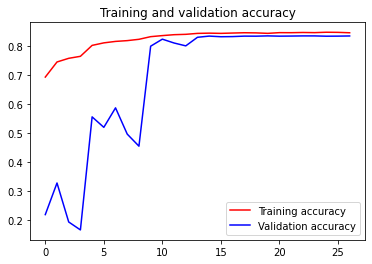

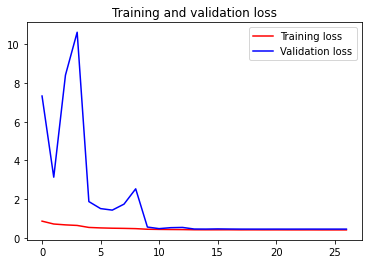

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()